In [273]:
# download heart disease dataset as heart.csv
# (https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

# data has been download to the same directory as this notebook (heart.csv)

In [274]:
# import data and show head

import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [275]:
# encode the Sex, ChestPainType, RestingECG, ExerciseAngina ST_Slope

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])


# show head

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [276]:
# describe the data

df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [277]:
# fill the missing values with mean

df.fillna(df.mean(), inplace=True)

In [278]:
# show correlation

df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


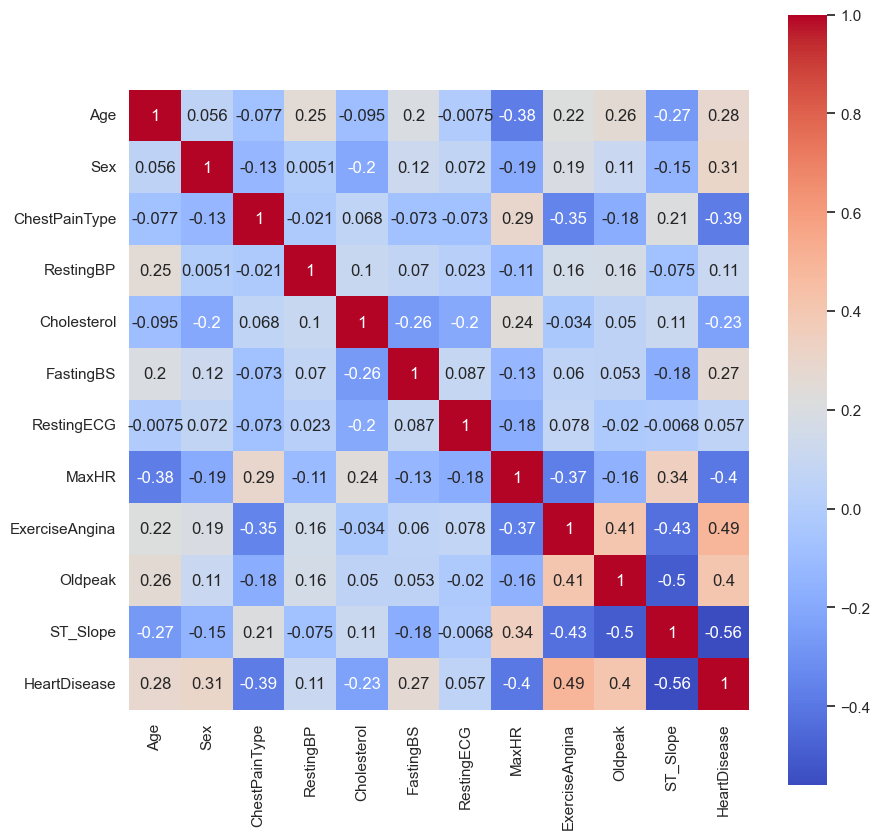

In [279]:
# show correlation in a heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.set(style='whitegrid', context='notebook')
cols = [0, 1, 2]
sns.heatmap(df.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()


In [280]:
# split the data into features and target
# use iloc to select the columns to use for the features

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X


array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [281]:
# covert the data into 0 - 1 range using minmax scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaler = scaler.fit_transform(X)

df = pd.DataFrame(X_scaler)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.244898,1.0,0.333333,0.70,0.479270,0.0,0.5,0.788732,0.0,0.295455,1.0
1,0.428571,0.0,0.666667,0.80,0.298507,0.0,0.5,0.676056,0.0,0.409091,0.5
2,0.183673,1.0,0.333333,0.65,0.469320,0.0,1.0,0.267606,0.0,0.295455,1.0
3,0.408163,0.0,0.000000,0.69,0.354892,0.0,0.5,0.338028,1.0,0.465909,0.5
4,0.530612,1.0,0.666667,0.75,0.323383,0.0,0.5,0.436620,0.0,0.295455,1.0


In [ ]:
# split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.3, random_state=42)



In [283]:
# Build a classification model using various supervised machine 
# learning models and check which model gives you the best accuracy

# use the following models
# 1. Logistic Regression
# 2. K Nearest Neighbors
# 3. Support Vector Machine
# 4. Decision Tree
# 5. Random Forest
# 6. KFold

In [284]:
# using logistic regression

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

score = log_reg.score(X_test, y_test)

print('Logistic Regression Accuracy: ', score)

Logistic Regression Accuracy:  0.8695652173913043


In [285]:
# using K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)

print('K Nearest Neighbors Accuracy: ', score)

K Nearest Neighbors Accuracy:  0.8659420289855072


/Users/adekanbidansteve/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [286]:
# using Support Vector Machine

from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

score = svm.score(X_test, y_test)

print('Support Vector Machine Accuracy: ', score)

Support Vector Machine Accuracy:  0.8804347826086957


In [287]:
# using Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score = dt.score(X_test, y_test)

print('Decision Tree Accuracy: ', score)

Decision Tree Accuracy:  0.7427536231884058


In [288]:
# using Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)

print('Random Forest Accuracy: ', score)

Random Forest Accuracy:  0.8804347826086957


In [289]:
# using KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = KNeighborsClassifier(n_neighbors=5)

KFold_Validation = KFold()

result = cross_val_score(model, X_train, y_train, cv=KFold_Validation)

print('KFold Accuracy results: ', result)
print('KFold Accuracy: ', result.mean())

KFold Accuracy results:  [0.81395349 0.85271318 0.859375   0.8046875  0.8203125 ]
KFold Accuracy:  0.8302083333333332


/Users/adekanbidansteve/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/adekanbidansteve/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

In [290]:
# conclusion before PCA - principal component analysis

# show that best modal is Random Forest with 0.8985507246376812 accuracy

In [291]:
# Now use PCA to reduce the dimensionality of the data and
# retrain the models to see what impacts it has on your model in terms of accuracy.
# keep in mind that many times doing PCA can actually decrease the accuracy of your model
# but computation is much lighter and that's trade off you need to consider while build models in real life

In [292]:
# use PCA to reduce the dimensionality of the data

from sklearn.decomposition import PCA

pca = PCA(0.95)

x_pca = pca.fit_transform(X_scaler)

# Show the number of components
x_pca.shape

(918, 8)

In [293]:
# split the data into training and testing sets using the new data

X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [294]:
# now retrain the models

In [295]:
# using logistic regression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

score = log_reg.score(X_test, y_test)

print('Logistic Regression Accuracy: ', score)

Logistic Regression Accuracy:  0.8623188405797102


In [296]:
# using K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)

print('K Nearest Neighbors Accuracy (after PCA): ', score)

K Nearest Neighbors Accuracy (after PCA):  0.8623188405797102


/Users/adekanbidansteve/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [297]:
# using Support Vector Machine

svm = SVC()

svm.fit(X_train, y_train)

score = svm.score(X_test, y_test)

print('Support Vector Machine Accuracy (after PCA): ', score)

Support Vector Machine Accuracy (after PCA):  0.8804347826086957


In [298]:
# using Decision Tree

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

score = dt.score(X_test, y_test)

print('Decision Tree Accuracy (after PCA): ', score)

Decision Tree Accuracy (after PCA):  0.8333333333333334


In [299]:
# using Random Forest

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)

print('Random Forest Accuracy (after PCA): ', score)

Random Forest Accuracy (after PCA):  0.8731884057971014


In [300]:
# using KFold

model = KNeighborsClassifier(n_neighbors=5)

KFold_Validation = KFold()

result = cross_val_score(model, X_train, y_train, cv=KFold_Validation)

print('KFold Accuracy results (after PCA): ', result)
print('KFold Accuracy (after PCA): ', result.mean())

KFold Accuracy results (after PCA):  [0.8372093  0.84496124 0.8515625  0.796875   0.8203125 ]
KFold Accuracy (after PCA):  0.8301841085271316


/Users/adekanbidansteve/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/adekanbidansteve/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value

In [301]:
# conclusion after PCA

# show that best modal is Random Forest with 0.8913043478260869 accuracy